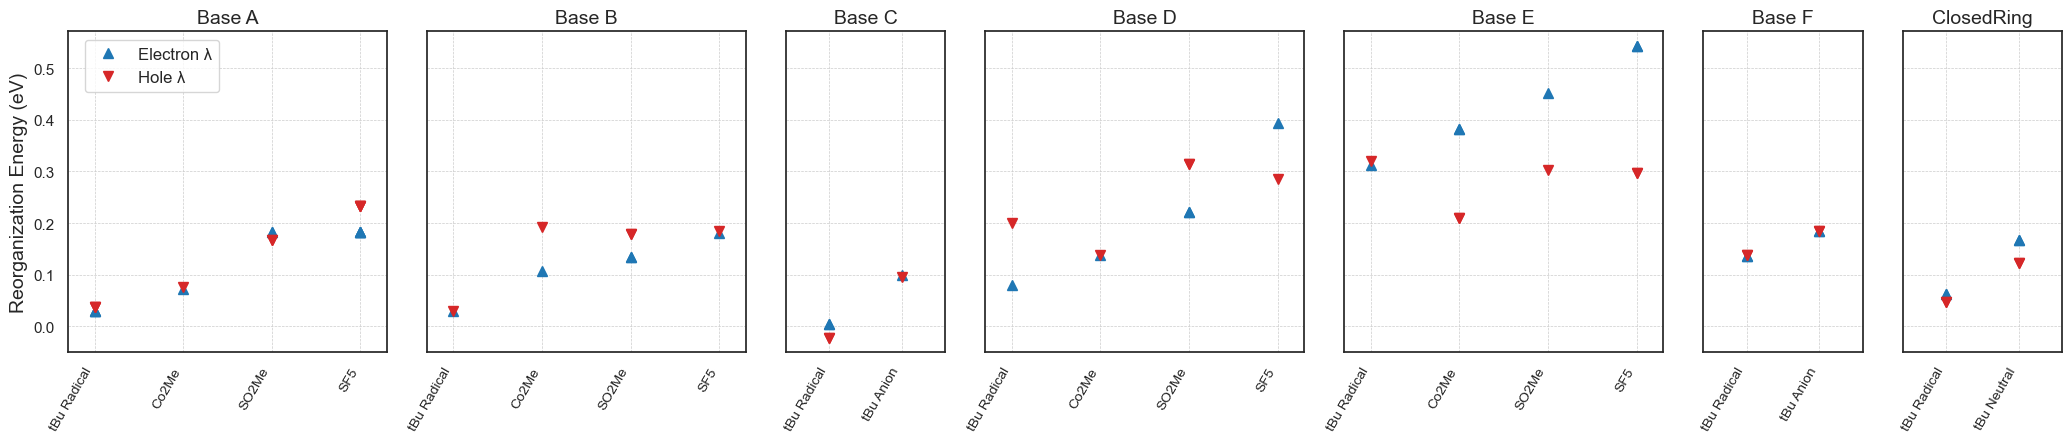

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "Data.xlsx"
sheet_names = ["Base A", "Base B", "Base C", "Base D", "Base E", "Base F", "ClosedRing"]
width_ratios = [1, 1, 0.5, 1, 1, 0.5, 0.5]

fig, axes = plt.subplots(1, 7, figsize=(24, 5), sharey=True,
                         gridspec_kw={'width_ratios': width_ratios})

axes = axes.flatten()

for ax, sheet, width_ratio in zip(axes, sheet_names, width_ratios):
    df = pd.read_excel(file_path, sheet_name=sheet)
    df = df.rename(columns={"reorg_e": "e_reorg", "reorg_h": "h_reorg"})
    df_filtered = df[["e- mobility", "e_reorg", "h_reorg"]].dropna()

    df_filtered["e_reorg"] = pd.to_numeric(df_filtered["e_reorg"], errors="coerce")
    df_filtered["h_reorg"] = pd.to_numeric(df_filtered["h_reorg"], errors="coerce")
    df_filtered.dropna(inplace=True)

    functional_groups = df_filtered["e- mobility"].astype(str).unique()
    x_pos = np.arange(len(functional_groups))
    x_mapping = {group: pos for pos, group in enumerate(functional_groups)}

    for group in functional_groups:
        subset = df_filtered[df_filtered["e- mobility"].astype(str) == group]
        x_points = np.full(len(subset), x_mapping[group])

        ax.plot(x_points, subset["e_reorg"], '^', color='#1f77b4', markersize=7,
                label='Electron λ' if group == functional_groups[0] else "")
        ax.plot(x_points, subset["h_reorg"], 'v', color='#d62728', markersize=7,
                label='Hole λ' if group == functional_groups[0] else "")

    ax.set_title(sheet, fontsize=14)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(functional_groups, rotation=60, ha='right', fontsize=10)
    ax.grid(True, linestyle="--", linewidth=0.5)

    # Slightly expand x-axis limits to avoid crowded edges on narrow plots
    padding = 0.6 if width_ratio < 1 else 0.3
    ax.set_xlim(-padding, len(functional_groups) - 1 + padding)

axes[0].set_ylabel("Reorganization Energy (eV)", fontsize=14)

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', fontsize=12, bbox_to_anchor=(0.128, 0.8))

fig.tight_layout(rect=[0.03, 0.03, 0.90, 0.95])

plt.savefig('reorg_1x7_custom_width_final.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\jh121\AppData\Local\Temp\ipykernel_21268\2099141983.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='e- mobility', columns='Base', values='e_reorg', aggfunc='mean')


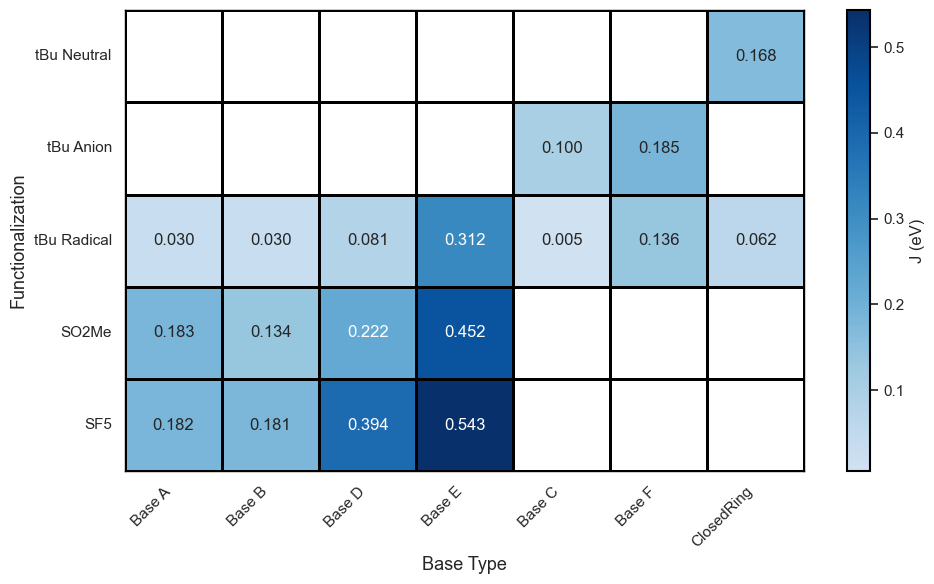

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Load Excel data
file_path = "Data.xlsx"
sheet_names = ["Base A", "Base B", "Base C", "Base D", "Base E", "Base F", "ClosedRing"]

# Read and combine all sheets
dfs = []
for sheet in sheet_names:
    df_temp = pd.read_excel(file_path, sheet_name=sheet)
    df_temp['Base'] = sheet
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

# Strip any accidental whitespace in labels
df['e- mobility'] = df['e- mobility'].str.strip()

# Define custom orders
func_order = ['tBu Neutral', 'tBu Anion', 'tBu Radical', 'CO2Me', 'SO2Me', 'SF5']
base_order = ['Base A', 'Base B', 'Base D', 'Base E', 'Base C', 'Base F', 'ClosedRing']

# Apply categorical ordering
df['e- mobility'] = df['e- mobility'].astype(CategoricalDtype(categories=func_order, ordered=True))
df['Base'] = df['Base'].astype(CategoricalDtype(categories=base_order, ordered=True))

# Pivot table (swapped axes: functionalization as rows, base as columns)
pivot_df = df.pivot_table(index='e- mobility', columns='Base', values='e_reorg', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.set(style="white")

import seaborn as sns
import matplotlib.pyplot as plt

def truncate_colormap(cmap, minval=0.2, maxval=1.0, n=256):
    new_cmap = cm.colors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

cmap = truncate_colormap(plt.cm.Blues, 0.2, 1.0)  # Min value can be increased for bolder low edges

norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
edge_colors = [cmap(norm(j)) for j in edge_weights]

ax = sns.heatmap(
    pivot_df,
    annot=True,
    fmt=".3f",
    cmap=cmap,
    cbar_kws={'label': 'J (eV)'},
    linewidths=1,
    linecolor="black"
)

# Access the colorbar and set black outline
cbar = ax.collections[0].colorbar  # Get the colorbar object
for spine in cbar.ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)  # Optional: make the line thicker

# Make sure edges are drawn
ax.set_frame_on(True)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1)

# Titles and labels
plt.xlabel("Base Type", fontsize=13)
plt.ylabel("Functionalization", fontsize=13)

# Clean tick formatting
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Final layout and save
plt.tight_layout()
plt.savefig('reorg_e.png', dpi=1000)
plt.show()


C:\Users\jh121\AppData\Local\Temp\ipykernel_21268\3509346514.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='e- mobility', columns='Base', values='h_reorg', aggfunc='mean')


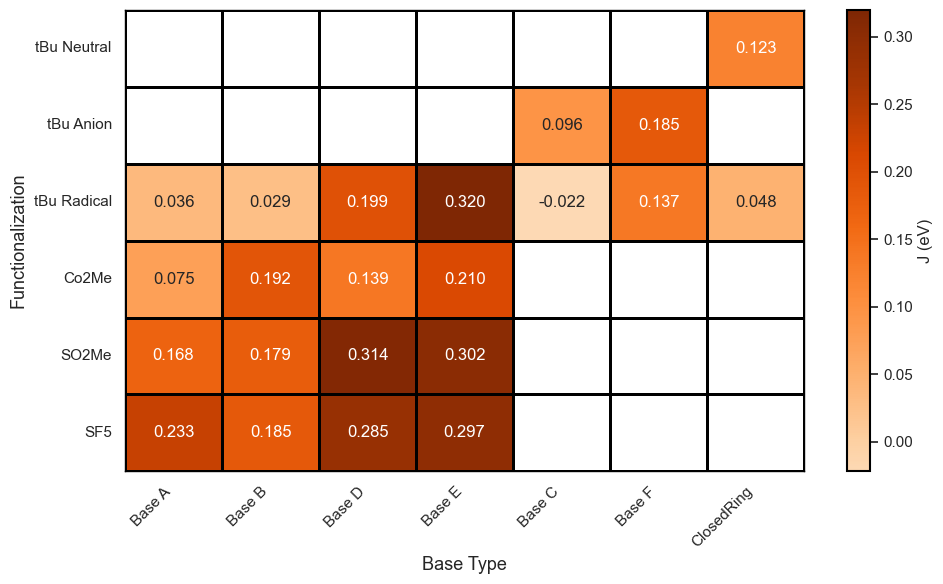

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Load Excel data
file_path = "Data.xlsx"
sheet_names = ["Base A", "Base B", "Base C", "Base D", "Base E", "Base F", "ClosedRing"]

# Read and combine all sheets
dfs = []
for sheet in sheet_names:
    df_temp = pd.read_excel(file_path, sheet_name=sheet)
    df_temp['Base'] = sheet
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

# Strip any accidental whitespace in labels
df['e- mobility'] = df['e- mobility'].str.strip()

# Define custom orders
func_order = ['tBu Neutral', 'tBu Anion', 'tBu Radical', 'Co2Me', 'SO2Me', 'SF5']
base_order = ['Base A', 'Base B', 'Base D', 'Base E', 'Base C', 'Base F', 'ClosedRing']

# Apply categorical ordering
df['e- mobility'] = df['e- mobility'].astype(CategoricalDtype(categories=func_order, ordered=True))
df['Base'] = df['Base'].astype(CategoricalDtype(categories=base_order, ordered=True))

# Pivot table (swapped axes: functionalization as rows, base as columns)
pivot_df = df.pivot_table(index='e- mobility', columns='Base', values='h_reorg', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.set(style="white")

import seaborn as sns
import matplotlib.pyplot as plt

def truncate_colormap(cmap, minval=0.2, maxval=1.0, n=256):
    new_cmap = cm.colors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

cmap = truncate_colormap(plt.cm.Oranges, 0.2, 1.0)  # Min value can be increased for bolder low edges

norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
edge_colors = [cmap(norm(j)) for j in edge_weights]

ax = sns.heatmap(
    pivot_df,
    annot=True,
    fmt=".3f",
    cmap=cmap,
    cbar_kws={'label': 'J (eV)'},
    linewidths=1,
    linecolor="black"
)

# Access the colorbar and set black outline
cbar = ax.collections[0].colorbar  # Get the colorbar object
for spine in cbar.ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)  # Optional: make the line thicker

# Make sure edges are drawn
ax.set_frame_on(True)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1)

# Titles and label
plt.xlabel("Base Type", fontsize=13)
plt.ylabel("Functionalization", fontsize=13)

# Clean tick formatting
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Final layout and save
plt.tight_layout()
plt.savefig('reorg_h.png', dpi=1000)
plt.show()


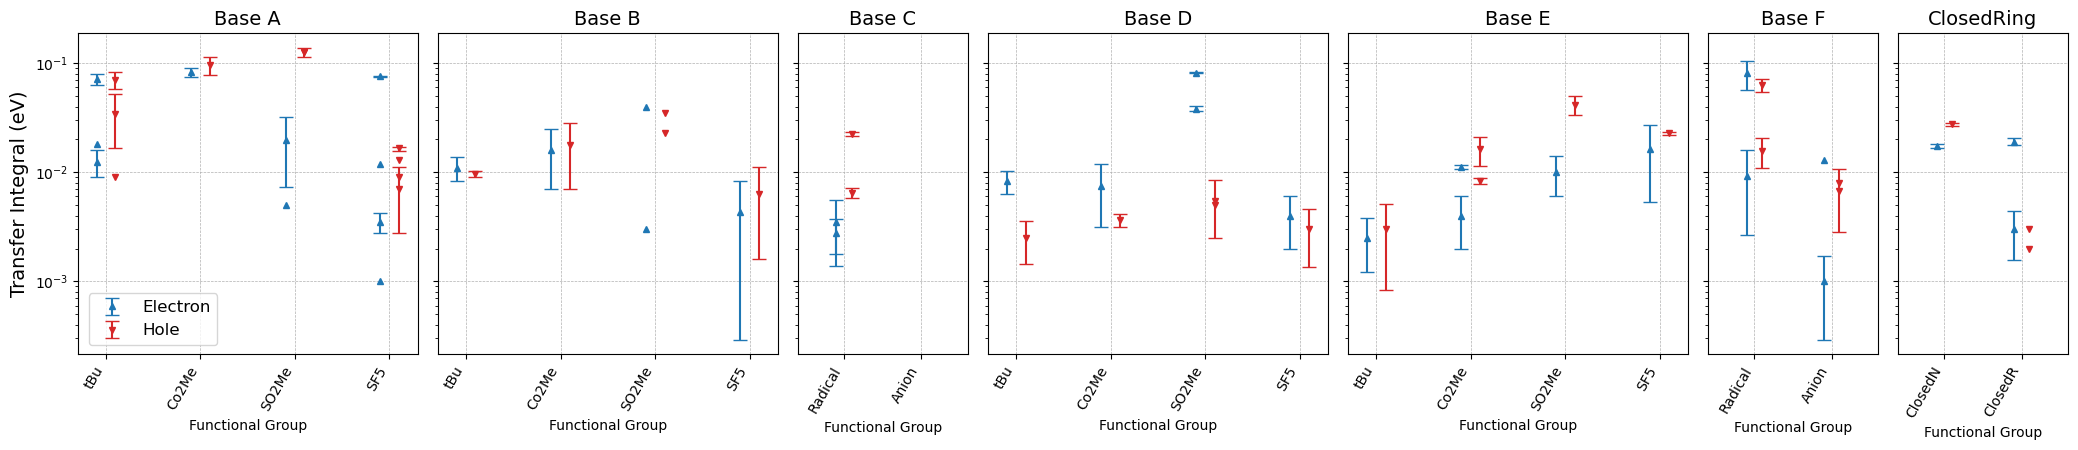

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# Load Excel data
file_path = "Data.xlsx"
sheet_names = ["Base A", "Base B", "Base C", "Base D", "Base E", "Base F", "ClosedRing"]
width_ratios = [1, 1, 0.5, 1, 1, 0.5, 0.5]  # Half-width for ClosedRing and Katherine

fig, axes = plt.subplots(1, 7, figsize=(24, 5), sharey=True,
                         gridspec_kw={'width_ratios': width_ratios})

axes = axes.flatten()

for ax, sheet, width_ratio in zip(axes, sheet_names, width_ratios):
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Rename columns clearly

    df_filtered = df[["e- mobility", "e_J_mean", "e_J_std", "h_J_mean", "h_J_std"]].dropna()
    numeric_cols = ["e_J_mean", "e_J_std", "h_J_mean", "h_J_std"]
    df_filtered[numeric_cols] = df_filtered[numeric_cols].apply(pd.to_numeric, errors='coerce')
    df_filtered = df_filtered.dropna()

    functional_groups = df_filtered["e- mobility"].astype(str).unique()
    x_pos = np.arange(len(functional_groups))
    x_mapping = {group: pos for pos, group in enumerate(functional_groups)}

    offset = 0.1  # Offset to separate electron/hole

    for _, row in df_filtered.iterrows():
        x_base = x_mapping[str(row["e- mobility"])]

    # Electron data points (offset left)
        if row["e_J_std"] != 0:
            ax.errorbar(x_base - offset, row["e_J_mean"], yerr=row["e_J_std"], fmt='^',
                    color='#1f77b4', capsize=5, markersize=5,
                    label='Electron' if _ == 0 else "")
        else:
            ax.plot(x_base - offset, row["e_J_mean"], '^',
                color='#1f77b4', markersize=5,
                label='Electron' if _ == 0 else "")

    # Hole data points (offset right)
        if row["h_J_std"] != 0:
            ax.errorbar(x_base + offset, row["h_J_mean"], yerr=row["h_J_std"], fmt='v',
                    color='#d62728', capsize=5, markersize=5,
                    label='Hole' if _ == 0 else "")
        else:
            ax.plot(x_base + offset, row["h_J_mean"], 'v',
                color='#d62728', markersize=5,
                label='Hole' if _ == 0 else "")

    ax.set_title(sheet, fontsize=14)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(functional_groups, rotation=60, ha='right', fontsize=10)
    ax.set_xlabel("Functional Group")
    ax.grid(True, linestyle="--", linewidth=0.5)
    ax.set_yscale('log')

    # Dynamic padding for narrow plots
    padding = 0.6 if width_ratio < 1 else 0.3
    ax.set_xlim(-padding, len(functional_groups) - 1 + padding)

axes[0].set_ylabel("Transfer Integral (eV)", fontsize=14)

# Single legend positioned nicely
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12, bbox_to_anchor=(0.126, 0.37))
plt.tight_layout(rect=[0.03, 0.03, 0.90, 0.95])
plt.savefig('J_1x7_custom_width_final.png', dpi=300, bbox_inches='tight')
plt.show()



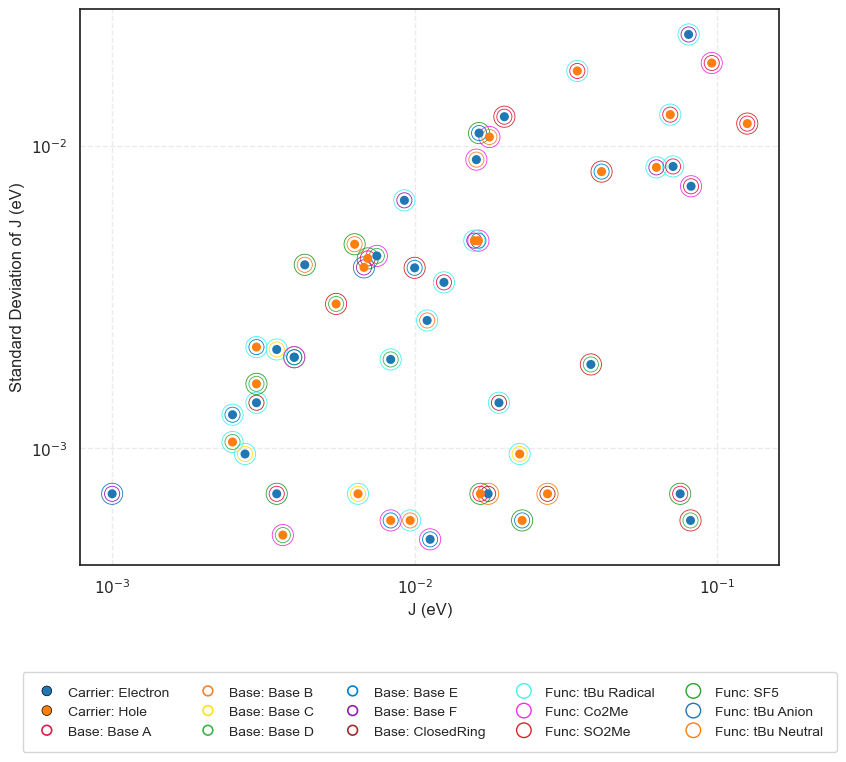

In [ ]:
# Final Checkpoint: Improved Concentric Circles Plot Code (Center filled, outer circles hollow)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.lines import Line2D

# Load data
file_path = "Data.xlsx"
sheet_names = ["Base A", "Base B", "Base C", "Base D", "Base E", "Base F", "ClosedRing"]

all_data = []
for sheet in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df = df.rename(columns={
        "mean": "e_J_mean", "std": "e_J_std",
        "mean.1": "h_J_mean", "std.1": "h_J_std"
    })
    df["Base"] = sheet
    df = df[["e- mobility", "e_J_mean", "e_J_std", "h_J_mean", "h_J_std", "Base"]]
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True).dropna()

# Prepare DataFrame
electron_df = df_all[["Base", "e- mobility", "e_J_mean", "e_J_std"]].rename(
    columns={"e- mobility": "Functionalization", "e_J_mean": "J", "e_J_std": "J_std"}
)
electron_df["Carrier"] = "Electron"

hole_df = df_all[["Base", "e- mobility", "h_J_mean", "h_J_std"]].rename(
    columns={"e- mobility": "Functionalization", "h_J_mean": "J", "h_J_std": "J_std"}
)
hole_df["Carrier"] = "Hole"

long_df = pd.concat([electron_df, hole_df], ignore_index=True).dropna()
filtered_df = long_df[(long_df["J"] > 0) & (long_df["J_std"] > 0)].copy()

# Color maps
carrier_colors = {"Electron": "#1f77b4", "Hole": "#ff7f0e"}
# Bright & distinct colors for 7 Bases
# Final saturated, high-contrast color palettes
base_colors = [
    "#e6194b", "#f58231", "#ffe119", "#3cb44b",
    "#0082c8", "#911eb4", "#a52a2a"
]

func_colors = [
    "#46f0f0", "#f032e6", "#d62728", "#2ca02c",
    "#1f77b4", "#ff7f0e", "#6a3d9a"
]




# Extract unique names in the order they appear in the filtered data
base_names = filtered_df["Base"].unique().tolist()
func_names = filtered_df["Functionalization"].unique().tolist()

base_palette = {name: color for name, color in zip(base_names, base_colors)}
func_palette = {name: color for name, color in zip(func_names, func_colors)}

# Compute log-scale bounds
x_vals, y_vals = np.log10(filtered_df["J"]), np.log10(filtered_df["J_std"])
x_margin, y_margin = 0.05 * (x_vals.max()-x_vals.min()), 0.05 * (y_vals.max()-y_vals.min())
xlim = (x_vals.min()-x_margin, x_vals.max()+x_margin)
ylim = (y_vals.min()-y_margin, y_vals.max()+y_margin)

# Plotting with aspect ratio fixed
fig, ax = plt.subplots(figsize=(10, 8))

for _, row in filtered_df.iterrows():
    log_x, log_y = np.log10(row["J"]), np.log10(row["J_std"])
    carrier, base, func = row["Carrier"], row["Base"], row["Functionalization"]

    # Outer circle (Functionalization)
    outer_circle = mpatches.Circle((log_x, log_y), radius=0.035, transform=ax.transData,
                                   facecolor='none', edgecolor=func_palette[func], lw=0.6, zorder=1)
    ax.add_patch(outer_circle)

    # Middle circle (Base)
    middle_circle = mpatches.Circle((log_x, log_y), radius=0.025, transform=ax.transData,
                                    facecolor='none', edgecolor=base_palette[base], lw=0.6, zorder=2)
    ax.add_patch(middle_circle)

    # Inner circle filled (Carrier)
    inner_circle = mpatches.Circle((log_x, log_y), radius=0.015, transform=ax.transData,
                                   facecolor=carrier_colors[carrier], edgecolor='none', lw=0, zorder=3)
    ax.add_patch(inner_circle)

# Fix aspect ratio to avoid oval distortion
ax.set_aspect('equal', adjustable='box')

# Ticks formatting
log_xticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1]) + 1)
log_yticks = np.arange(np.floor(ylim[0]), np.ceil(ylim[1]) + 1)
ax.set_xticks(log_xticks)
ax.set_xticklabels([f"$10^{{{int(t)}}}$" for t in log_xticks])
ax.set_yticks(log_yticks)
ax.set_yticklabels([f"$10^{{{int(t)}}}$" for t in log_yticks])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Labels and Title
ax.set_xlabel("J (eV)", fontsize=12)
ax.set_ylabel("Standard Deviation of J (eV)", fontsize=12)

import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch

# Helper to preserve circle shape in legend
class HandlerCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = (xdescent + width / 2, ydescent + height / 2)

        # Custom scaling based on size tag
        scale = getattr(orig_handle, "_legend_size", 1.0)

        p = mpatches.Circle(
            xy=center,
            radius=(min(width, height) / 2) * scale,
            facecolor=orig_handle.get_facecolor(),
            edgecolor=orig_handle.get_edgecolor(),
            lw=orig_handle.get_linewidth()
        )
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

# Build up the legend elements as (handle, label) tuples
legend_elements = []

# Carrier (inner filled circle)
for carrier, color in carrier_colors.items():
    circ = mpatches.Circle((0, 0), radius=0.15, facecolor=color, edgecolor='black', lw=0.5)
    legend_elements.append((circ, f"Carrier: {carrier}"))

# Base (middle ring, hollow)
for base, color in base_palette.items():
    circ = mpatches.Circle((0, 0), radius=0.15, facecolor='none', edgecolor=color, lw=1.2)
    legend_elements.append((circ, f"Base: {base}"))

# Functionalization (outer ring, hollow)
# Functionalization (outer ring, hollow, larger in legend)
# Functionalization (outer ring, hollow, larger in legend)
for func, color in func_palette.items():
    circ = mpatches.Circle((0, 0), radius=0.15, facecolor='none', edgecolor=color, lw=1)
    circ._legend_size = 1.5  # ✅ Make this circle 1.5× larger in the legend
    legend_elements.append((circ, f"Func: {func}"))



# ✅ Separate handles and labels correctly
legend_handles, legend_labels = zip(*legend_elements)

# Add the legend with custom circle handler
ax.legend(
    handles=legend_handles,
    labels=legend_labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.35),  # Centered below plot
    ncol=5,                       # 5 columns
    handler_map={mpatches.Circle: HandlerCircle()},
    borderpad=1,
    labelspacing=0.5,
    handlelength=1.5,
    handletextpad=0.8,
    fontsize=10,                 # Optional: adjust to fit nicely
    title_fontsize=11
)



ax.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('mobility_plot.png', dpi=1000)
plt.show()


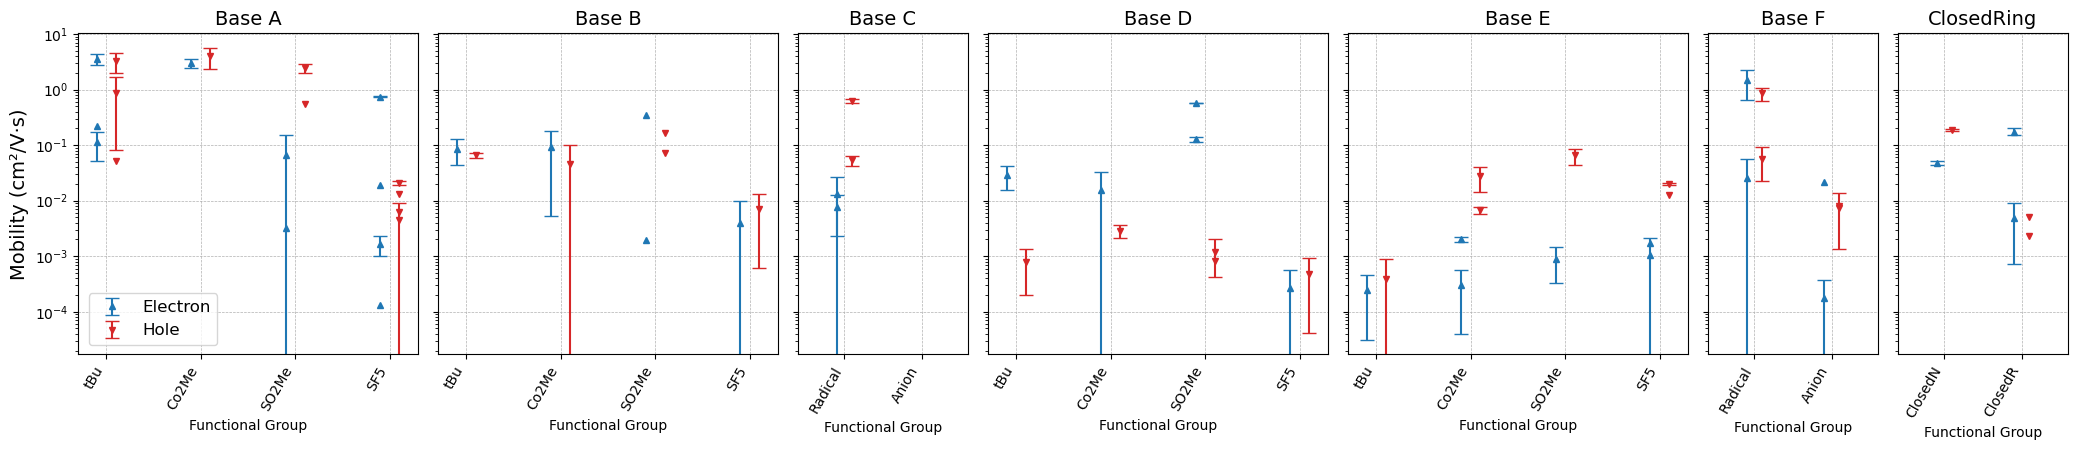

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# Load Excel data
file_path = "Data.xlsx"
sheet_names = ["Base A", "Base B", "Base C", "Base D", "Base E", "Base F", "ClosedRing"]
width_ratios = [1, 1, 0.5, 1, 1, 0.5, 0.5]  # Half-width for ClosedRing and Katherine

fig, axes = plt.subplots(1, 7, figsize=(24, 5), sharey=True,
                         gridspec_kw={'width_ratios': width_ratios})

axes = axes.flatten()

for ax, sheet, width_ratio in zip(axes, sheet_names, width_ratios):
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Rename columns clearly
    df = df.rename(columns={"mean": "e_mean", "std": "e_std", "mean.1": "h_mean", "std.1": "h_std"})

    df_filtered = df[["e- mobility", "e_mean", "e_std", "h_mean", "h_std"]].dropna()
    numeric_cols = ["e_mean", "e_std", "h_mean", "h_std"]
    df_filtered[numeric_cols] = df_filtered[numeric_cols].apply(pd.to_numeric, errors='coerce')
    df_filtered = df_filtered.dropna()

    functional_groups = df_filtered["e- mobility"].astype(str).unique()
    x_pos = np.arange(len(functional_groups))
    x_mapping = {group: pos for pos, group in enumerate(functional_groups)}

    offset = 0.1  # Offset to separate electron/hole

    for _, row in df_filtered.iterrows():
        x_base = x_mapping[str(row["e- mobility"])]

    # Electron data points (offset left)
        if row["e_std"] != 0:
            ax.errorbar(x_base - offset, row["e_mean"], yerr=row["e_std"], fmt='^',
                    color='#1f77b4', capsize=5, markersize=5,
                    label='Electron' if _ == 0 else "")
        else:
            ax.plot(x_base - offset, row["e_mean"], '^',
                color='#1f77b4', markersize=5,
                label='Electron' if _ == 0 else "")

    # Hole data points (offset right)
        if row["h_std"] != 0:
            ax.errorbar(x_base + offset, row["h_mean"], yerr=row["h_std"], fmt='v',
                    color='#d62728', capsize=5, markersize=5,
                    label='Hole' if _ == 0 else "")
        else:
            ax.plot(x_base + offset, row["h_mean"], 'v',
                color='#d62728', markersize=5,
                label='Hole' if _ == 0 else "")


    ax.set_title(sheet, fontsize=14)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(functional_groups, rotation=60, ha='right', fontsize=10)
    ax.set_xlabel("Functional Group")
    ax.grid(True, linestyle="--", linewidth=0.5)
    ax.set_yscale('log')

    # Dynamic padding for narrow plots
    padding = 0.6 if width_ratio < 1 else 0.3
    ax.set_xlim(-padding, len(functional_groups) - 1 + padding)

axes[0].set_ylabel("Mobility (cm²/V·s)", fontsize=14)

# Single legend positioned nicely
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12, bbox_to_anchor=(0.126, 0.37))


plt.tight_layout(rect=[0.03, 0.03, 0.90, 0.95])
plt.savefig('mobility_1x7_custom_width_final.png', dpi=300, bbox_inches='tight')
plt.show()



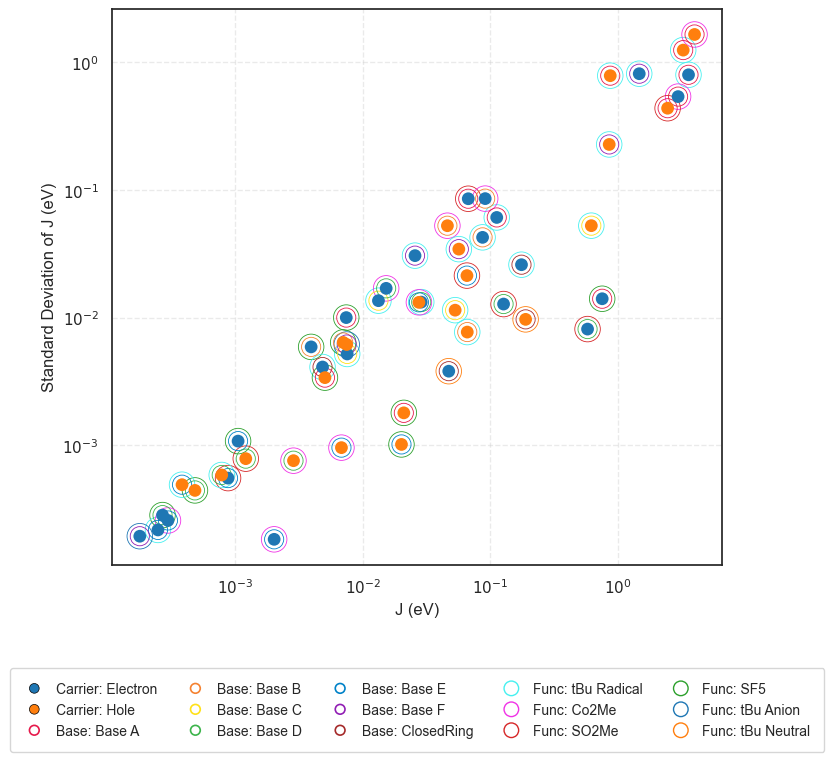

In [35]:
# Final Checkpoint: Improved Concentric Circles Plot Code (Center filled, outer circles hollow)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.lines import Line2D

# Load data
file_path = "Data.xlsx"
sheet_names = ["Base A", "Base B", "Base C", "Base D", "Base E", "Base F", "ClosedRing"]

all_data = []
for sheet in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df = df.drop(columns=["e_J_mean", "e_J_std", "h_J_mean", "h_J_std"], errors='ignore')
    df = df.rename(columns={
    "e_mean": "e_J_mean",
    "e_std": "e_J_std",
    "h_mean": "h_J_mean",
    "h_std": "h_J_std"
})


    df["Base"] = sheet
    df = df[["e- mobility", "e_J_mean", "e_J_std", "h_J_mean", "h_J_std", "Base"]]
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True).dropna()

# Prepare DataFrame
electron_df = df_all[["Base", "e- mobility", "e_J_mean", "e_J_std"]].rename(
    columns={"e- mobility": "Functionalization", "e_J_mean": "J", "e_J_std": "J_std"}
)
electron_df["Carrier"] = "Electron"

hole_df = df_all[["Base", "e- mobility", "h_J_mean", "h_J_std"]].rename(
    columns={"e- mobility": "Functionalization", "h_J_mean": "J", "h_J_std": "J_std"}
)
hole_df["Carrier"] = "Hole"

long_df = pd.concat([electron_df, hole_df], ignore_index=True).dropna()
filtered_df = long_df[(long_df["J"] > 0) & (long_df["J_std"] > 0)].copy()

# Color maps
carrier_colors = {"Electron": "#1f77b4", "Hole": "#ff7f0e"}
# Bright & distinct colors for 7 Bases
# Final saturated, high-contrast color palettes
base_colors = [
    "#e6194b", "#f58231", "#ffe119", "#3cb44b",
    "#0082c8", "#911eb4", "#a52a2a"
]

func_colors = [
    "#46f0f0", "#f032e6", "#d62728", "#2ca02c",
    "#1f77b4", "#ff7f0e", "#6a3d9a"
]




# Extract unique names in the order they appear in the filtered data
base_names = filtered_df["Base"].unique().tolist()
func_names = filtered_df["Functionalization"].unique().tolist()

base_palette = {name: color for name, color in zip(base_names, base_colors)}
func_palette = {name: color for name, color in zip(func_names, func_colors)}

# Compute log-scale bounds
x_vals, y_vals = np.log10(filtered_df["J"]), np.log10(filtered_df["J_std"])
x_margin, y_margin = 0.05 * (x_vals.max()-x_vals.min()), 0.05 * (y_vals.max()-y_vals.min())
xlim = (x_vals.min()-x_margin, x_vals.max()+x_margin)
ylim = (y_vals.min()-y_margin, y_vals.max()+y_margin)

# Plotting with aspect ratio fixed
fig, ax = plt.subplots(figsize=(10, 8))

for _, row in filtered_df.iterrows():
    log_x, log_y = np.log10(row["J"]), np.log10(row["J_std"])
    carrier, base, func = row["Carrier"], row["Base"], row["Functionalization"]

    # Outer circle (Functionalization)
    outer_circle = mpatches.Circle((log_x, log_y), radius=0.1, transform=ax.transData,
                                   facecolor='none', edgecolor=func_palette[func], lw=0.6, zorder=1)
    ax.add_patch(outer_circle)

    # Middle circle (Base)
    middle_circle = mpatches.Circle((log_x, log_y), radius=0.075, transform=ax.transData,
                                    facecolor='none', edgecolor=base_palette[base], lw=0.6, zorder=2)
    ax.add_patch(middle_circle)

    # Inner circle filled (Carrier)
    inner_circle = mpatches.Circle((log_x, log_y), radius=0.05, transform=ax.transData,
                                   facecolor=carrier_colors[carrier], edgecolor='none', lw=0, zorder=3)
    ax.add_patch(inner_circle)

# Fix aspect ratio to avoid oval distortion
ax.set_aspect('equal', adjustable='box')

# Ticks formatting
log_xticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1]) + 1)
log_yticks = np.arange(np.floor(ylim[0]), np.ceil(ylim[1]) + 1)
ax.set_xticks(log_xticks)
ax.set_xticklabels([f"$10^{{{int(t)}}}$" for t in log_xticks])
ax.set_yticks(log_yticks)
ax.set_yticklabels([f"$10^{{{int(t)}}}$" for t in log_yticks])

ax.set_xlim(xlim)

ax.set_ylim(ylim)



# Labels and Title
ax.set_xlabel("J (eV)", fontsize=12)
ax.set_ylabel("Standard Deviation of J (eV)", fontsize=12)

import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch

# Helper to preserve circle shape in legend
class HandlerCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = (xdescent + width / 2, ydescent + height / 2)

        # Custom scaling based on size tag
        scale = getattr(orig_handle, "_legend_size", 1.0)

        p = mpatches.Circle(
            xy=center,
            radius=(min(width, height) / 2) * scale,
            facecolor=orig_handle.get_facecolor(),
            edgecolor=orig_handle.get_edgecolor(),
            lw=orig_handle.get_linewidth()
        )
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

# Build up the legend elements as (handle, label) tuples
legend_elements = []

# Carrier (inner filled circle)
for carrier, color in carrier_colors.items():
    circ = mpatches.Circle((0, 0), radius=0.15, facecolor=color, edgecolor='black', lw=0.5)
    legend_elements.append((circ, f"Carrier: {carrier}"))

# Base (middle ring, hollow)
for base, color in base_palette.items():
    circ = mpatches.Circle((0, 0), radius=0.15, facecolor='none', edgecolor=color, lw=1.2)
    legend_elements.append((circ, f"Base: {base}"))

# Functionalization (outer ring, hollow)
# Functionalization (outer ring, hollow, larger in legend)
# Functionalization (outer ring, hollow, larger in legend)
for func, color in func_palette.items():
    circ = mpatches.Circle((0, 0), radius=0.15, facecolor='none', edgecolor=color, lw=1)
    circ._legend_size = 1.5  # ✅ Make this circle 1.5× larger in the legend
    legend_elements.append((circ, f"Func: {func}"))



# ✅ Separate handles and labels correctly
legend_handles, legend_labels = zip(*legend_elements)

# Add the legend with custom circle handler
ax.legend(
    handles=legend_handles,
    labels=legend_labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.35),  # Centered below plot
    ncol=5,                       # 5 columns
    handler_map={mpatches.Circle: HandlerCircle()},
    borderpad=1,
    labelspacing=0.5,
    handlelength=1.5,
    handletextpad=0.8,
    fontsize=10,                 # Optional: adjust to fit nicely
    title_fontsize=11
)



ax.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('J_plot.png', dpi=1000)
plt.show()


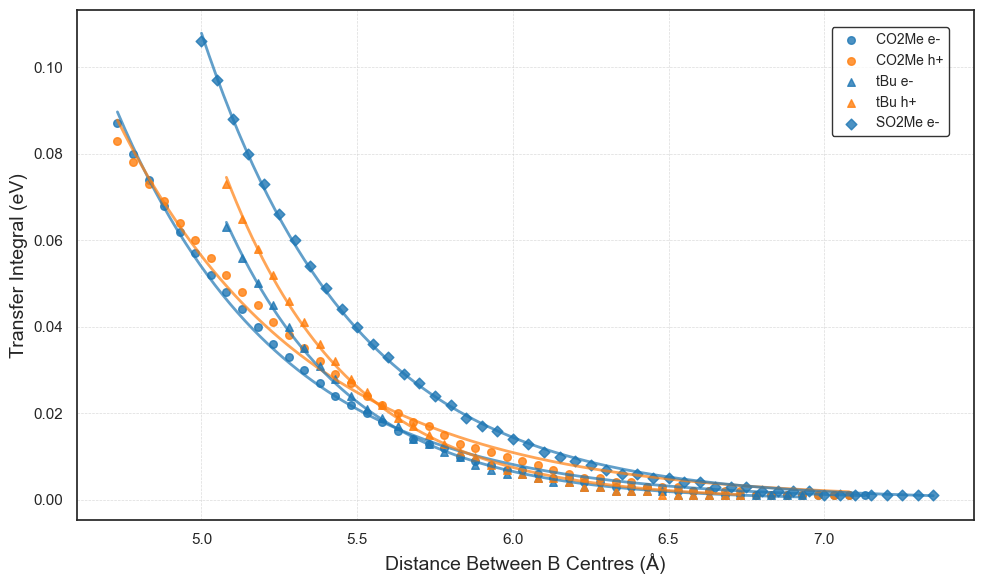


Decay Scaling Constants:
CO2Me e-: Decay scaling constant=1.888
CO2Me h+: Decay scaling constant=1.641
tBu e-: Decay scaling constant=2.481
tBu h+: Decay scaling constant=2.498
SO2Me e-: Decay scaling constant=2.012


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Load and preprocess data
file_path = "Data.xlsx"
sheet_name = "JvsX"
df = pd.read_excel(file_path, sheet_name=sheet_name).dropna(how="all")

# Extract relevant columns
distance = df.iloc[:, 0].astype(float)
hole_integrals = df.iloc[:, 1:].astype(float)

# Exponential decay function
def exp_decay(x, A, B):
    return A * np.exp(-B * x)

# Identifying distance columns
distance_columns = [col for col in df.columns if "Distance Between B centre" in col]

# Setup functional groups and markers (SF5 removed)
functional_groups = ['CO2Me', 'tBu', 'SO2Me']
markers = ['o', '^', 'D']
color_scheme = {'h+': '#ff7f0e', 'e-': '#1f77b4'}

plt.figure(figsize=(10, 6))

# Store results for printing outside the graph
results_summary = []

# Plot each transfer integral (excluding SF5)
for col in hole_integrals.columns:
    if 'SF5' in col:
        continue  # Skip SF5 group entirely

    col_index = df.columns.get_loc(col)
    dist_candidates = [df.columns.get_loc(dc) for dc in distance_columns if df.columns.get_loc(dc) < col_index]
    distance_col = df.iloc[:, max(dist_candidates)].astype(float) if dist_candidates else distance

    x_data = distance_col.values
    y_data = hole_integrals[col].values

    mask = (y_data <= 0.5) & np.isfinite(y_data) & np.isfinite(x_data)
    x_filtered, y_filtered = x_data[mask], y_data[mask]

    func_group = next((fg for fg in functional_groups if fg in col), None)
    charge_type = 'h+' if 'h+' in col else 'e-'

    marker = markers[functional_groups.index(func_group)] if func_group else 'o'
    color = color_scheme[charge_type]

    if len(x_filtered) > 2:
        popt, _ = curve_fit(exp_decay, x_filtered, y_filtered, p0=(max(y_filtered), 1.0))
        A_fit, B_fit = popt

        plt.scatter(x_filtered, y_filtered, marker=marker, s=30, color=color, alpha=0.8,
                    label=f"{func_group} {charge_type}")

        x_fit = np.linspace(min(x_filtered), max(x_filtered), 200)
        y_fit = exp_decay(x_fit, *popt)
        plt.plot(x_fit, y_fit, linestyle="-", linewidth=2, alpha=0.7, color=color)

        # Append results for summary
        results_summary.append(f"{func_group} {charge_type}: Decay scaling constant={B_fit:.3f}")

# Avoid duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10, frameon=True,
           loc='upper right', bbox_to_anchor=(0.98, 0.98), facecolor='white', edgecolor='black')

# Plot aesthetics
plt.xlabel("Distance Between B Centres (Å)", fontsize=14)
plt.ylabel("Transfer Integral (eV)", fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.savefig('JvsX.png', dpi=1000)
plt.show()

# Print summary results outside the plot
print("\nDecay Scaling Constants:")
for summary in results_summary:
    print(summary)

/var/folders/qf/4s9xcm254ld1zzm6ss3mf3840000gq/T/ipykernel_869/3002205837.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Projective"] = pd.to_numeric(df_clean["Projective"], errors="coerce")
/var/folders/qf/4s9xcm254ld1zzm6ss3mf3840000gq/T/ipykernel_869/3002205837.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Gaussian"] = pd.to_numeric(df_clean["Gaussian"], errors="coerce")
/var/folders/qf/4s9xcm254ld1zzm6ss3mf3840000gq/T/ipykernel_869/3002205837.py:15: SettingWithCopyWarnin

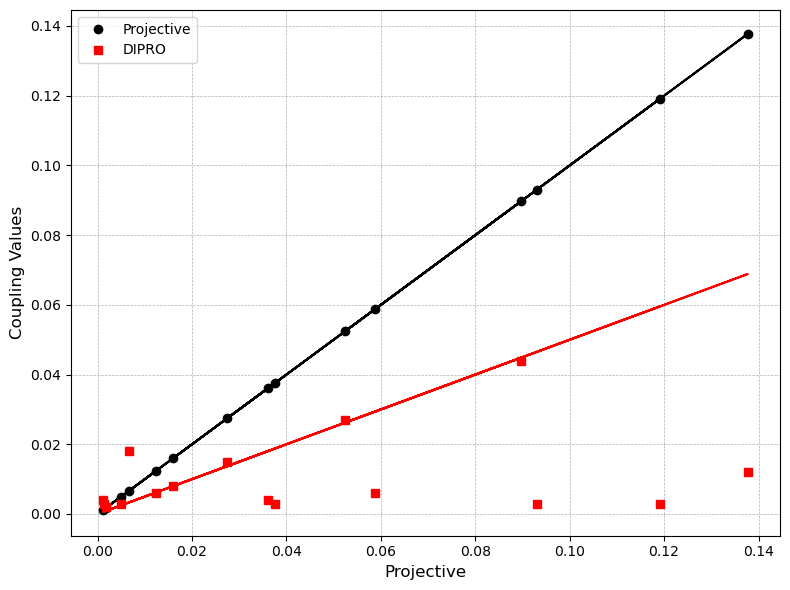

Mean Absolute Deviation (MAD) from the filtered DIPRO fit: 0.000685
R² (filtered points): 0.996808
Scaling factor between the Projective vs Gaussian and filtered Projective vs DIPRO lines: 2.000403
Scaling factor between the Projective vs Gaussian and filtered Projective vs DIPRO lines: 2.000403


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the 'Gaussian' sheet
file_path = "Data.xlsx"
df = pd.read_excel(file_path, sheet_name="Gaussian")

# Clean the data
df_clean = df[["Projective", "Gaussian", "DIPRO"]]

# Convert necessary columns to numeric, handling errors
df_clean["Projective"] = pd.to_numeric(df_clean["Projective"], errors="coerce")
df_clean["Gaussian"] = pd.to_numeric(df_clean["Gaussian"], errors="coerce")
df_clean["DIPRO"] = pd.to_numeric(df_clean["DIPRO"], errors="coerce")

# Drop NaN values
df_clean.dropna(inplace=True)

# Fit a straight line to Projective vs Gaussian with intercept forced to 0
slope_gaussian = np.sum(df_clean["Projective"] * df_clean["Gaussian"]) / np.sum(df_clean["Projective"] ** 2)

# ------ FILTERING FOR DIPRO FIT ------
# Only keep points where DIPRO is within 0.5 * Projective of the Projective value
mask = np.abs(df_clean["DIPRO"] - df_clean["Projective"]) <= 0.7 * np.abs(df_clean["Projective"])
df_dipro_filtered = df_clean[mask]

# Fit a straight line to filtered Projective vs DIPRO with intercept forced to 0
slope_dipro = np.sum(df_dipro_filtered["Projective"] * df_dipro_filtered["DIPRO"]) / np.sum(df_dipro_filtered["Projective"] ** 2)

# Calculate the scaling factor (constant ratio) between the two lines
scaling_factor = slope_gaussian / slope_dipro

# Create the plot
plt.figure(figsize=(8, 6))

# Plot Projective vs Gaussian with the line of best fit through (0,0)
plt.plot(df_clean["Projective"], df_clean["Gaussian"], 'o', label="Projective", color="black")
plt.plot(df_clean["Projective"], slope_gaussian * df_clean["Projective"], color="black")

# Plot Projective vs DIPRO (all points)
plt.plot(df_clean["Projective"], df_clean["DIPRO"], 's', label="DIPRO", color="red")

# Plot the filtered DIPRO points and their new line of best fit
plt.plot(df_clean["Projective"], slope_dipro * df_clean["Projective"], color="red")


# Add labels and title
plt.xlabel("Projective", fontsize=12)
plt.ylabel("Coupling Values", fontsize=12)


# Add a grid, legend, and show the plot
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend(fontsize=10)


# Save the plot
plt.tight_layout()
plt.savefig("projective_vs_coupling_with_filtered_dipro.png", dpi=300)
plt.show()

# Calculate R² for the filtered fit
predicted_dipro = slope_dipro * df_dipro_filtered["Projective"]
ss_total_filtered = np.sum((df_dipro_filtered["DIPRO"] - np.mean(df_dipro_filtered["DIPRO"])) ** 2)
ss_residual_filtered = np.sum((df_dipro_filtered["DIPRO"] - predicted_dipro) ** 2)
r_squared_filtered = 1 - (ss_residual_filtered / ss_total_filtered)

# Calculate the mean absolute deviation (MAD) for the filtered points
mad = np.mean(np.abs(df_dipro_filtered["DIPRO"] - predicted_dipro))

# Print final statistics
print(f"Mean Absolute Deviation (MAD) from the filtered DIPRO fit: {mad:.6f}")
print(f"R² (filtered points): {r_squared_filtered:.6f}")
print(f"Scaling factor between the Projective vs Gaussian and filtered Projective vs DIPRO lines: {scaling_factor:.6f}")

# Print the scaling factor
print(f"Scaling factor between the Projective vs Gaussian and filtered Projective vs DIPRO lines: {scaling_factor:.6f}")



=== AVERAGED RESULTS OVER ALL SIMULATIONS ===
Average Electron Diffusion Coefficient: 5.256e-09 m²/s
Average Electron Mobility: 2.033e-07 cm²/Vs
Average Hole Diffusion Coefficient: 6.130e-09 m²/s
Average Hole Mobility: 2.371e-07 cm²/Vs


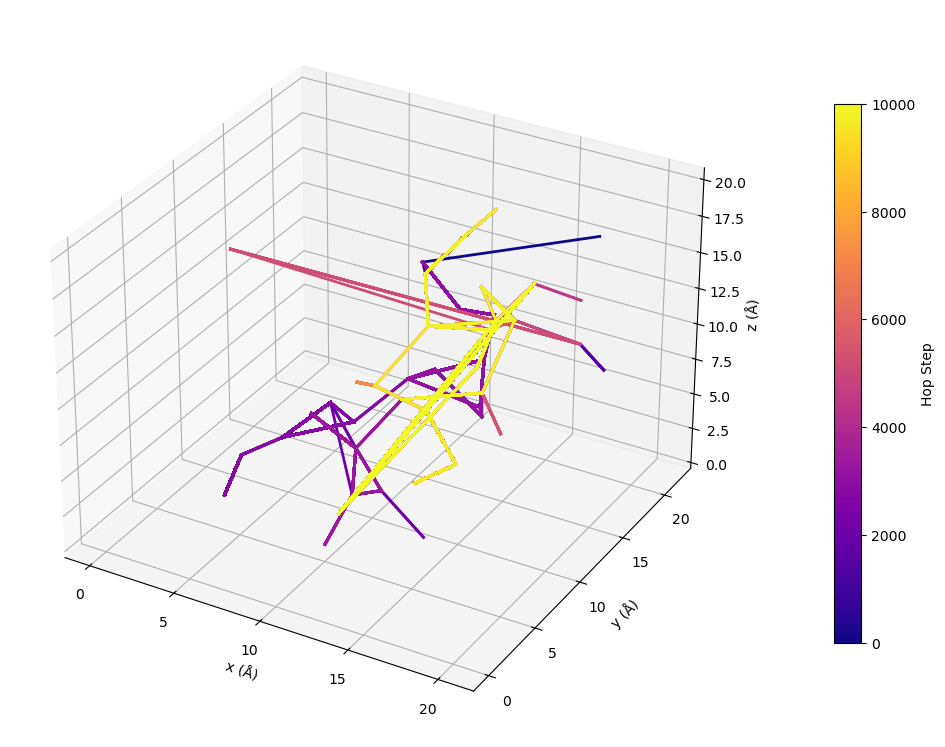

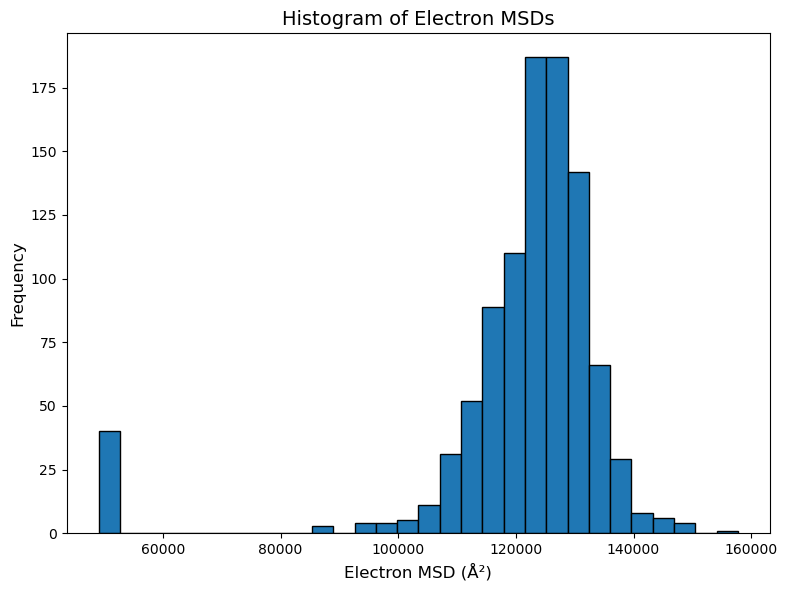

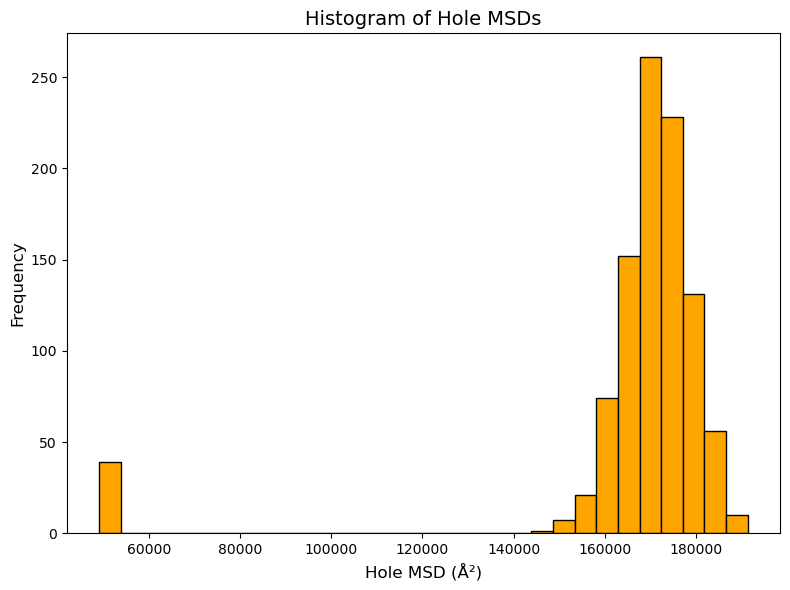

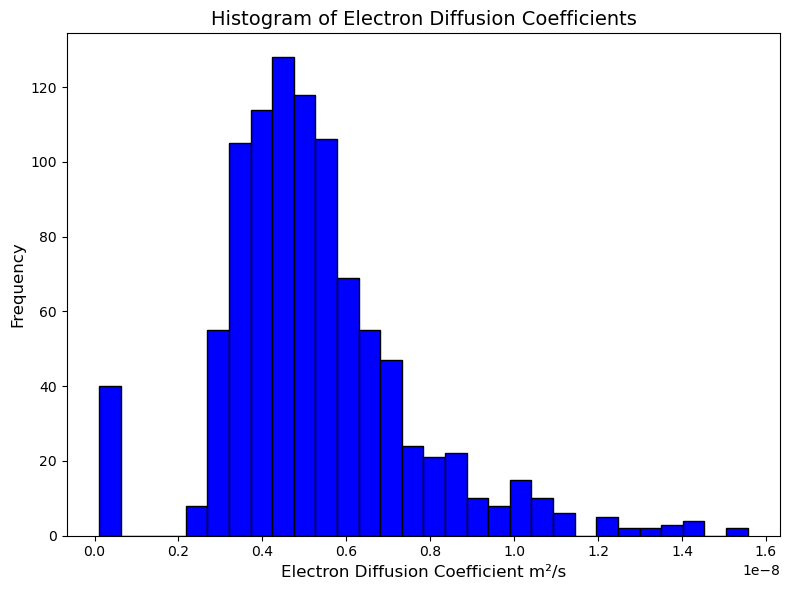

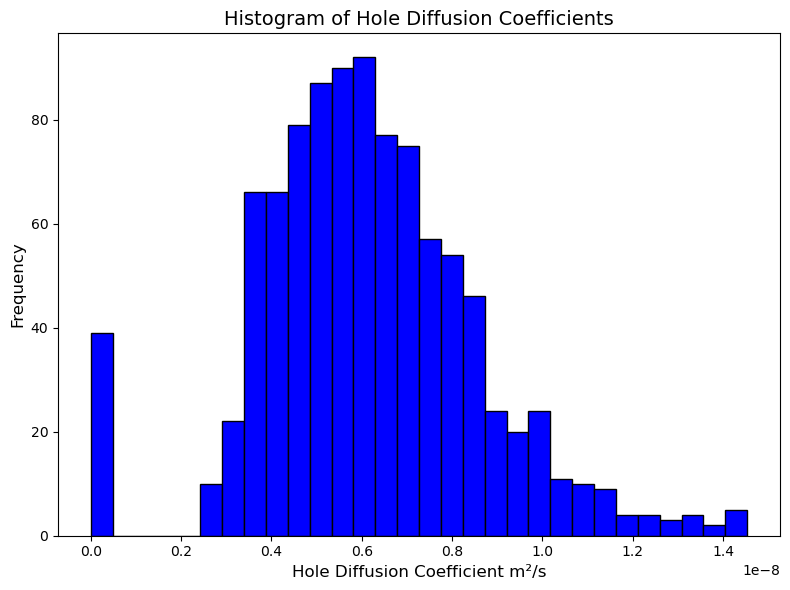

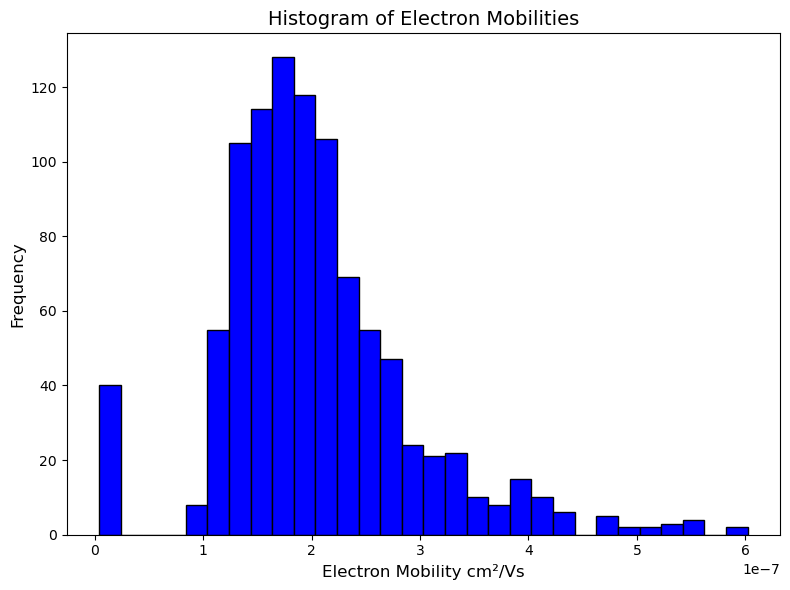

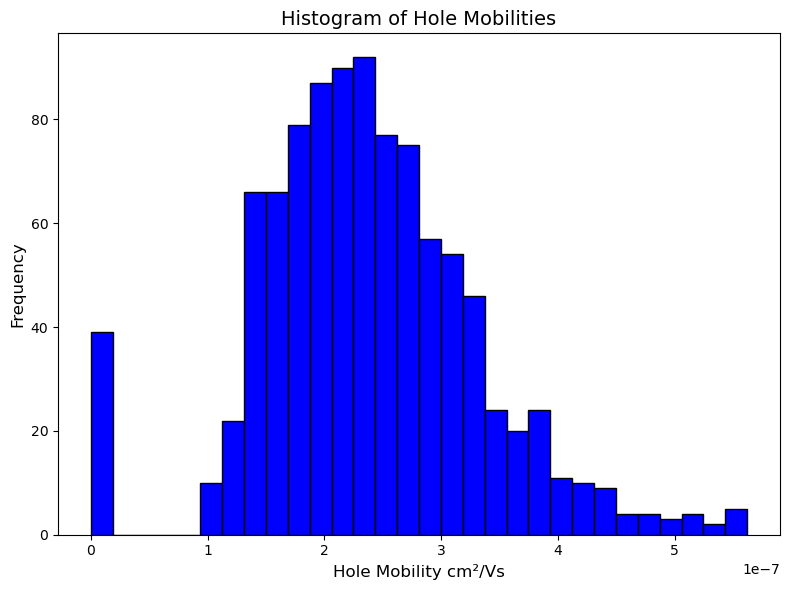

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ====== CONSTANTS ======
kB_eV = 8.617333262145e-5  # Boltzmann constant (eV/K)
e = 1.602e-19              # Elementary charge (C)
T = 300                    # Temperature (K)
hbar_eVs = 4.135667696e-15  # Planck constant h in eV.s

# ====== INPUT PARAMETERS ======
lambda_electron = 0.0138   # Electron reorganization energy (eV)
lambda_hole = 0.0139       # Hole reorganization energy (eV)
n_hops = 10000             # Number of KMC hops
J_multiplier = 2           # Multiply J values by this
n_simulations = 1000       # Number of separate simulations to run

# ====== LOAD DATA ======
coords = pd.read_csv('scoord.19_com.csv')
transfer_integrals = pd.read_csv('transfer_integrals_B3CO2Me.csv')

# ====== BUILD GRAPHS ======
G_electron = nx.Graph()
G_hole = nx.Graph()
positions = {}
for _, row in coords.iterrows():
    mol_id = str(row['Mol'])
    pos = np.array([row['x'], row['y'], row['z']]) * 1e-10  # Å to meters
    positions[mol_id] = pos
    G_electron.add_node(mol_id, pos=pos)
    G_hole.add_node(mol_id, pos=pos)

for _, row in transfer_integrals.iterrows():
    molA = str(row['MolA'])
    molB = str(row['MolB'])
    J_e = row['Charge_Transfer'] * J_multiplier
    J_h = row['Hole_Transfer'] * J_multiplier

    if molA in G_electron.nodes and molB in G_electron.nodes:
        G_electron.add_edge(molA, molB, J=J_e)
        G_hole.add_edge(molA, molB, J=J_h)

# ====== DETERMINE BOX SIZE FOR PBC ======
all_positions = np.array(list(positions.values()))
x_min, y_min, z_min = np.min(all_positions, axis=0)
x_max, y_max, z_max = np.max(all_positions, axis=0)
box_length = np.array([x_max - x_min, y_max - y_min, z_max - z_min])
box_min = np.array([x_min, y_min, z_min])

# ====== CUSTOM MARCUS RATE FUNCTION ======
def custom_marcus_rate(J, lamb, T):
    offset_lambda = lamb + 0.3
    denominator = np.sqrt(np.pi * offset_lambda * kB_eV * T)
    exp_term = np.exp(-offset_lambda / (4 * kB_eV * T))
    rate = (J ** 2) / hbar_eVs * (1 / denominator) * exp_term
    return rate

# ====== RUN KMC SIMULATION WITH PBC ======
def run_kmc_pbc(G, lamb, n_hops, box_length, box_min):
    current_node = np.random.choice(list(G.nodes))
    displacement = np.array([0.0, 0.0, 0.0])
    total_distance_squared = 0.0
    total_time = 0.0
    trajectory = [G.nodes[current_node]['pos']]

    for _ in range(n_hops):
        neighbors = list(G.neighbors(current_node))
        if not neighbors:
            break

        rates = [custom_marcus_rate(G[current_node][neighbor]['J'], lamb, T) for neighbor in neighbors]
        rates = np.array(rates)
        total_rate = np.sum(rates)

        if total_rate == 0:
            break

        r1 = np.random.rand()
        dt = -np.log(r1) / total_rate
        total_time += dt

        r2 = np.random.rand()
        cumulative_rates = np.cumsum(rates) / total_rate
        next_index = np.searchsorted(cumulative_rates, r2)
        next_node = neighbors[next_index]

        pos_current = G.nodes[current_node]['pos']
        pos_next = G.nodes[next_node]['pos']
        disp_vector = pos_next - pos_current
        disp_vector -= np.round(disp_vector / box_length) * box_length  # Apply PBC
        displacement += disp_vector
        total_distance_squared += np.sum(disp_vector ** 2)

        wrapped_pos_next = pos_next.copy()
        wrapped_pos_next -= np.floor((wrapped_pos_next - box_min) / box_length) * box_length + box_min
        trajectory.append(wrapped_pos_next)

        current_node = next_node

    if total_time > 0:
        D = total_distance_squared / (6 * total_time)
        mobility = e * D / (kB_eV * 1.602e-19 * T)
        MSD = total_distance_squared
    else:
        D = mobility = MSD = 0

    return D, mobility, np.array(trajectory), MSD

# ====== RUN SIMULATIONS ======
mobility_electron_list, mobility_hole_list = [], []
diffusion_electron_list, diffusion_hole_list = [], []
msd_electron_list, msd_hole_list = [], []

for _ in range(n_simulations):
    D_e, mu_e, traj_e, msd_e = run_kmc_pbc(G_electron, lambda_electron, n_hops, box_length, box_min)
    D_h, mu_h, traj_h, msd_h = run_kmc_pbc(G_hole, lambda_hole, n_hops, box_length, box_min)

    if mu_e > 0:
        mobility_electron_list.append(mu_e)
        diffusion_electron_list.append(D_e)
        msd_electron_list.append(msd_e)
    if mu_h > 0:
        mobility_hole_list.append(mu_h)
        diffusion_hole_list.append(D_h)
        msd_hole_list.append(msd_h)

avg_mu_electron = np.mean(mobility_electron_list)
avg_mu_hole = np.mean(mobility_hole_list)
avg_D_electron = np.mean(diffusion_electron_list)
avg_D_hole = np.mean(diffusion_hole_list)

print("\n=== AVERAGED RESULTS OVER ALL SIMULATIONS ===")
print(f"Average Electron Diffusion Coefficient: {avg_D_electron:.3e} m²/s")
print(f"Average Electron Mobility: {avg_mu_electron:.3e} cm²/Vs")
print(f"Average Hole Diffusion Coefficient: {avg_D_hole:.3e} m²/s")
print(f"Average Hole Mobility: {avg_mu_hole:.3e} cm²/Vs")

# ====== PLOT 3D RANDOM WALK FOR ONE ELECTRON ======
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
traj = traj_e * 1e10  # Convert to Å
num_points = len(traj)
norm = mcolors.Normalize(vmin=0, vmax=num_points)
cmap = cm.plasma
colors = cmap(np.linspace(0, 1, num_points))
for i in range(num_points - 1):
    ax.plot(traj[i:i+2,0], traj[i:i+2,1], traj[i:i+2,2], color=colors[i], linewidth=2)
ax.set_xlabel('x (Å)')
ax.set_ylabel('y (Å)')
ax.set_zlabel('z (Å)')
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, shrink=0.7, pad=0.1, label='Hop Step')
plt.tight_layout()
plt.show()

# ====== HISTOGRAM PLOTS ======
def plot_histogram(data, xlabel, title, bins=30, factor=1, unit="", color="blue"):
    plt.figure(figsize=(8,6))
    plt.hist(np.array(data) * factor, bins=bins, edgecolor='black', color=color)
    plt.xlabel(f'{xlabel} {unit}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()


# MSDs
# MSDs
plot_histogram(msd_electron_list, 'Electron MSD', 'Histogram of Electron MSDs', factor=1e20, unit='(Å²)', color='#1f77b4')
plot_histogram(msd_hole_list, 'Hole MSD', 'Histogram of Hole MSDs', factor=1e20, unit='(Å²)', color='orange')


# Diffusion coefficients
plot_histogram(diffusion_electron_list, 'Electron Diffusion Coefficient', 'Histogram of Electron Diffusion Coefficients', factor=1, unit='m²/s')
plot_histogram(diffusion_hole_list, 'Hole Diffusion Coefficient', 'Histogram of Hole Diffusion Coefficients', factor=1, unit='m²/s')

# Mobilities
plot_histogram(mobility_electron_list, 'Electron Mobility', 'Histogram of Electron Mobilities', factor=1, unit='cm²/Vs')
plot_histogram(mobility_hole_list, 'Hole Mobility', 'Histogram of Hole Mobilities', factor=1, unit='cm²/Vs')